In [21]:
import numpy as np

In [22]:
# implementing a single layer perceptron
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_1_activated = sigmoid(layer_1)
    return layer_1_activated

In [23]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])


The prediction result is: [0.7985731]


In [39]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _show(self):
        return self.weights, self.bias
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (derror_dweights * self.learning_rate)
            
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target)
            self._update_parameters(derror_dbias, derror_dweights)
            
            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

In [40]:
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)

In [42]:
neural_network.predict(input_vector)

0.9517574627785521

In [46]:
derror_dbias, derror_dweights = neural_network._compute_gradients(input_vector, target)
neural_network._update_parameters(derror_dbias, derror_dweights)
neural_network.predict(input_vector)

0.9398839689342484

In [47]:
derror_dbias, derror_dweights = neural_network._compute_gradients(input_vector, target)
neural_network._update_parameters(derror_dbias, derror_dweights)
neural_network.predict(input_vector)

0.9360605654558544

In [48]:
derror_dbias, derror_dweights = neural_network._compute_gradients(input_vector, target)
neural_network._update_parameters(derror_dbias, derror_dweights)
neural_network.predict(input_vector)

0.9317822732779987

In [54]:
import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.001

neural_network = NeuralNetwork(learning_rate)

Text(0, 0.5, 'Error for all training instances')

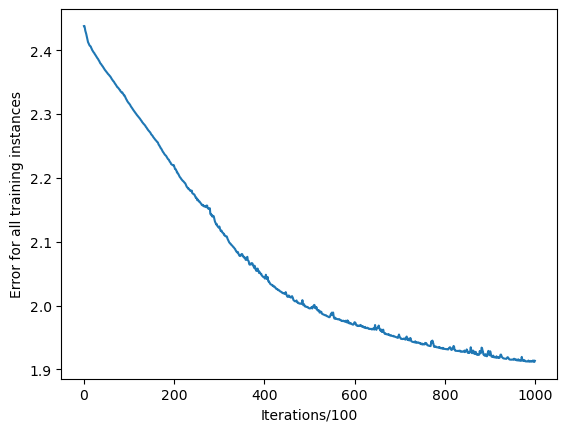

In [55]:
training_error = neural_network.train(input_vectors, targets, 100000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

Text(0, 0.5, 'Error for all training instances')

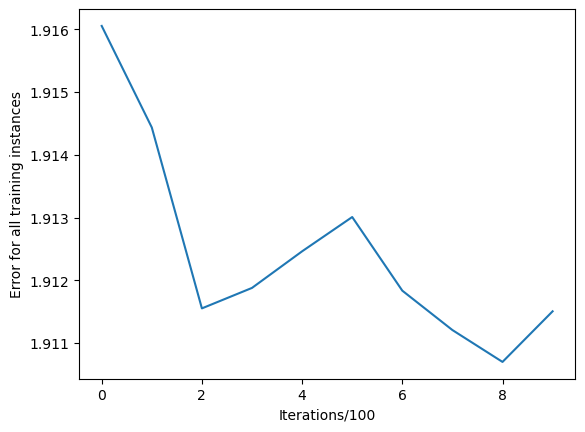

In [56]:
training_error = neural_network.train(input_vectors, targets, 1000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

### another example

C:\Users\utente\AppData\Local\Temp\ipykernel_16536\3844751778.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  bkg = np.random.multivariate_normal(bkg_mean, bkg_cov, 2000)


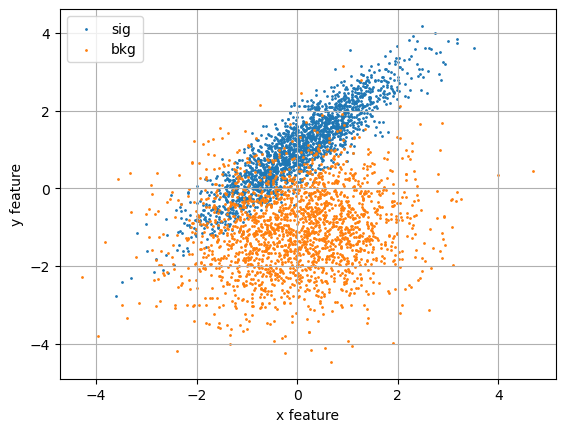

In [66]:
sig_mean = [0, 1]
sig_cov = [[1, +0.9], [+0.9, 1]]
sig = np.random.multivariate_normal(sig_mean, sig_cov, 2000)

bkg_mean = [0, -1]
bkg_cov = [[1, -0.5], [+0.9, 1]]
bkg = np.random.multivariate_normal(bkg_mean, bkg_cov, 2000)

plt.scatter(sig[:, 0], sig[:, 1], s=1, label='sig')
plt.scatter(bkg[:, 0], bkg[:, 1], s=1, label='bkg')
plt.grid()
plt.legend()
plt.xlabel('x feature')
plt.ylabel('y feature')
plt.show()

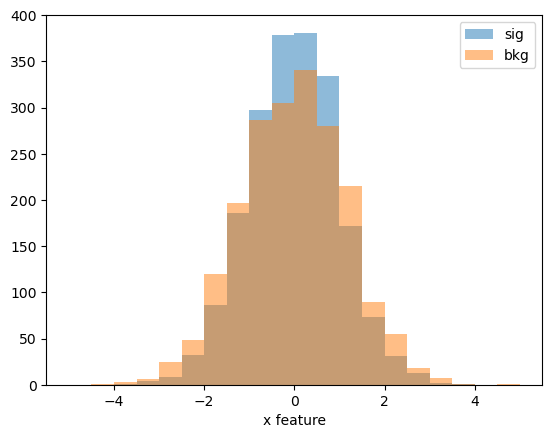

In [67]:
plt.hist(sig[:, 0], range=[-5, 5], bins=20, alpha=0.5, label='sig')
plt.hist(bkg[:, 0], range=[-5, 5], bins=20, alpha=0.5, label='bkg')
plt.legend()
plt.xlabel('x feature')
plt.show()

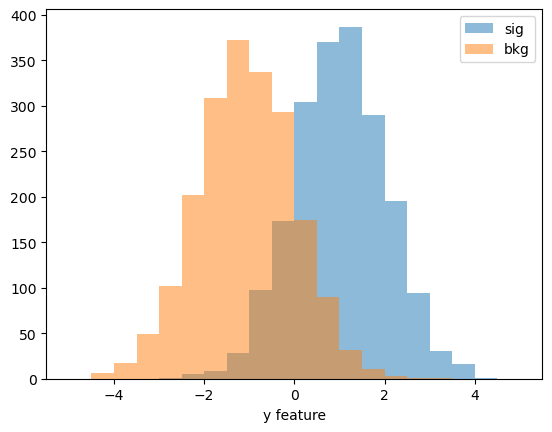

In [68]:
plt.hist(sig[:, 1], range=[-5, 5], bins=20, alpha=0.5, label='sig')
plt.hist(bkg[:, 1], range=[-5, 5], bins=20, alpha=0.5, label='bkg')
plt.legend()
plt.xlabel('y feature')
plt.show()

In [69]:
data_train=np.concatenate([sig, bkg])
targets=np.concatenate([np.ones(len(sig)), np.ones(len(bkg))*0])

### let's define our model

In [92]:
learning_rate = 0.01
neural_network = NeuralNetwork(learning_rate)

Now without training it, let's see if it help discriminating signal from background

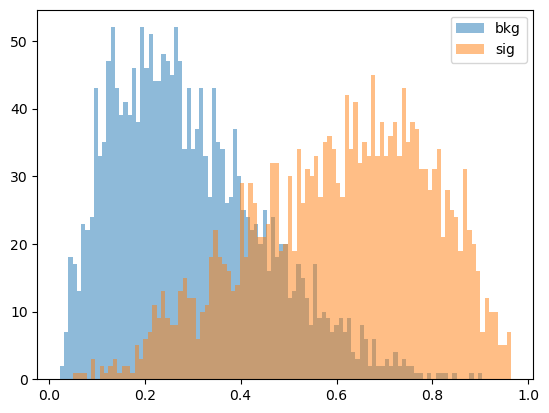

In [93]:
out = neural_network.predict(data_train)

plt.hist(out[targets==0], alpha=0.5, bins=100, label='bkg')
plt.hist(out[targets==1], alpha=0.5, bins=100, label='sig')
plt.legend()

plt.show()

Now let's see after training it

Text(0, 0.5, 'Error for all training instances')

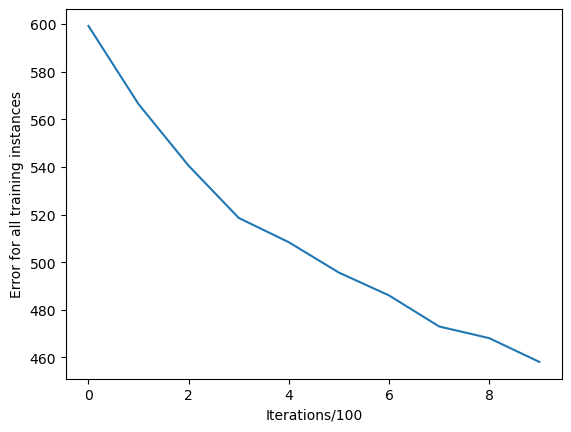

In [94]:
training_error = neural_network.train(data_train, targets, 1000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

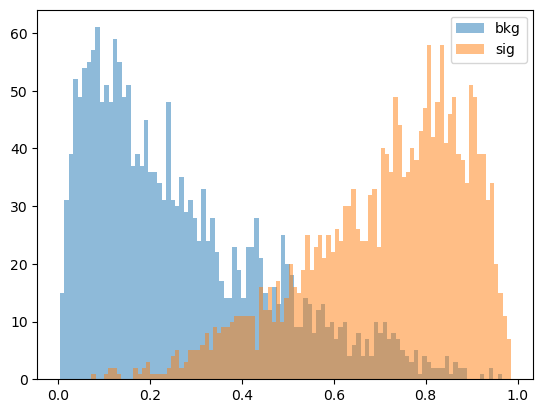

In [95]:
out = neural_network.predict(data_train)

plt.hist(out[targets==0], alpha=0.5, bins=100, label='bkg')
plt.hist(out[targets==1], alpha=0.5, bins=100, label='sig')
plt.legend()

plt.show()

Text(0, 0.5, 'Error for all training instances')

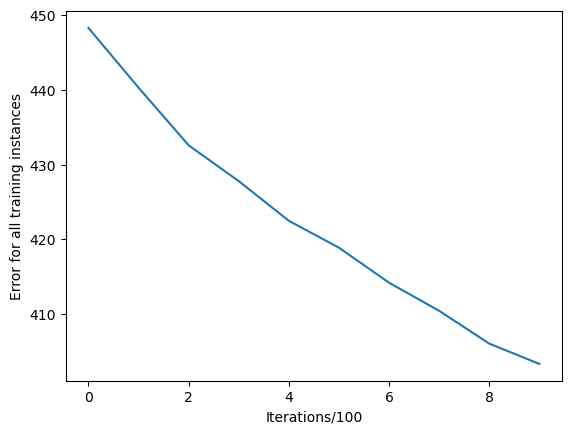

In [96]:
training_error = neural_network.train(data_train, targets, 1000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

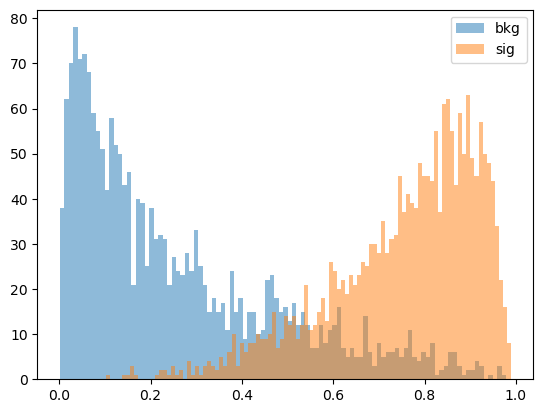

In [97]:
out = neural_network.predict(data_train)

plt.hist(out[targets==0], alpha=0.5, bins=100, label='bkg')
plt.hist(out[targets==1], alpha=0.5, bins=100, label='sig')
plt.legend()

plt.show()

Text(0, 0.5, 'Error for all training instances')

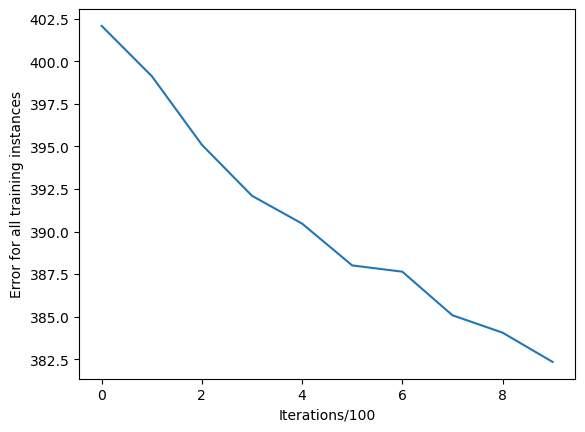

In [98]:
training_error = neural_network.train(data_train, targets, 1000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

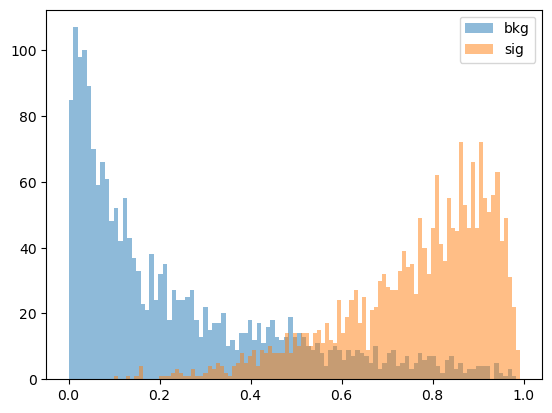

In [99]:
out = neural_network.predict(data_train)

plt.hist(out[targets==0], alpha=0.5, bins=100, label='bkg')
plt.hist(out[targets==1], alpha=0.5, bins=100, label='sig')
plt.legend()

plt.show()

Text(0, 0.5, 'Error for all training instances')

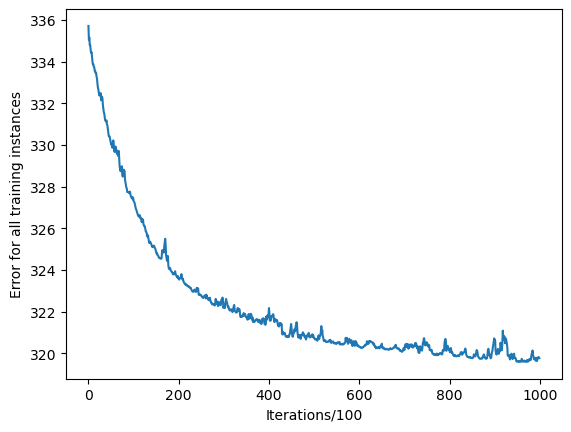

In [101]:
training_error = neural_network.train(data_train, targets, 100000)

plt.plot(training_error)
plt.xlabel("Iterations/100")
plt.ylabel("Error for all training instances")

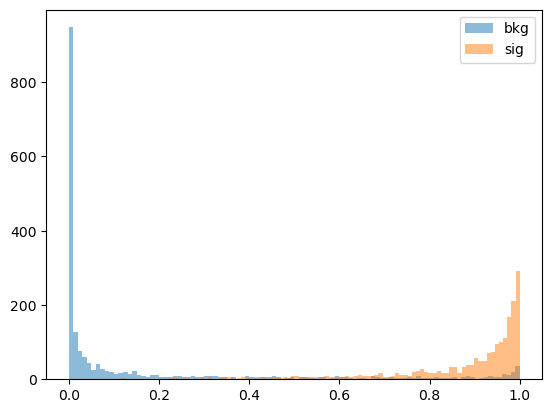

In [102]:
out = neural_network.predict(data_train)

plt.hist(out[targets==0], alpha=0.5, bins=100, label='bkg')
plt.hist(out[targets==1], alpha=0.5, bins=100, label='sig')
plt.legend()

plt.show()

In [103]:
sig_mean = [0, 1]
sig_cov = [[1, +0.9], [+0.9, 1]]
sig = np.random.multivariate_normal(sig_mean, sig_cov, 50)

bkg_mean = [0, -1]
bkg_cov = [[1, -0.5], [+0.9, 1]]
bkg = np.random.multivariate_normal(bkg_mean, bkg_cov, 50)

data=np.concatenate([sig, bkg])
data_targets=np.concatenate([np.ones(len(sig)), np.ones(len(bkg))*0])

out = neural_network.predict(data)

C:\Users\utente\AppData\Local\Temp\ipykernel_16536\478668992.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  bkg = np.random.multivariate_normal(bkg_mean, bkg_cov, 50)


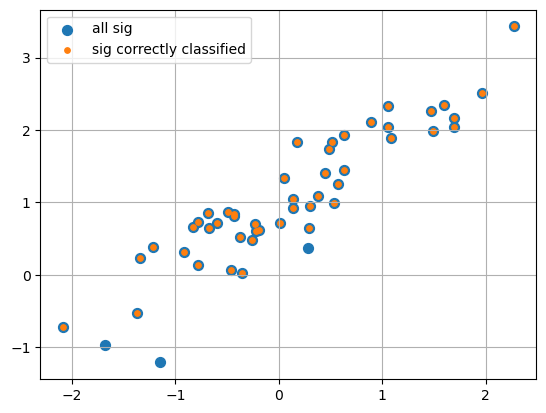

In [109]:
plt.scatter(data[:, 0][data_targets>0.5], data[:, 1][data_targets>0.5], s=50, label='all sig')
plt.scatter(data[:, 0][(data_targets>0.5)&(out>0.5)], data[:, 1][(data_targets>0.5)&(out>0.5)], s=15, label='sig correctly classified')
plt.grid()
plt.legend()
plt.show()

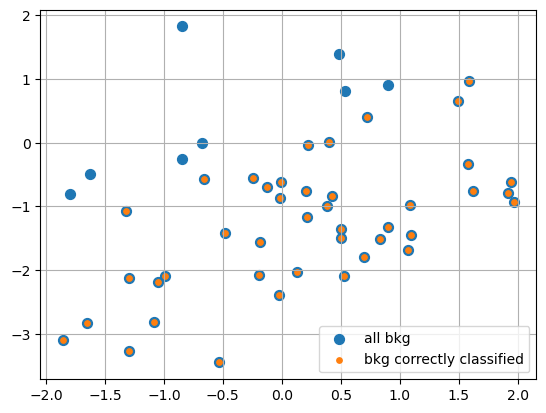

In [111]:
plt.scatter(data[:, 0][data_targets<=0.5], data[:, 1][data_targets<=0.5], s=50, label='all bkg')
plt.scatter(data[:, 0][(data_targets<=0.5)&(out<=0.5)], data[:, 1][(data_targets<=0.5)&(out<=0.5)], s=15, label='bkg correctly classified')
plt.grid()
plt.legend()
plt.show()

In [110]:
neural_network._show()

(array([-2.21252095,  3.42532307]), -0.6797810332785864)